# Machine Learning

- This **Notebook** contains the **Logistic Regression Model** trained on **Titanic Dataset**
- Note **Exploratory Data Analysis** have been performed in **Notebook** ml_LogisticRegression_Project01. 

## Data Cleaning and Preparation

In [17]:
import pandas as pd
import numpy as np

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
train = pd.read_csv('titanic_train.csv')

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


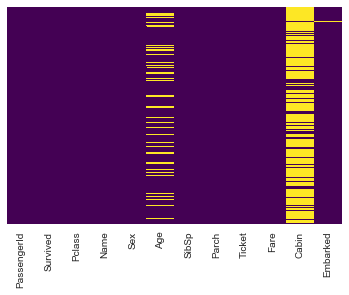

In [25]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [26]:
sns.set_style('whitegrid')

## Fill-in Missing Age Data 

- I want to fill in the missing rows in the **Age column** instead of droping the column entirely.

- One way I do this is by filling in the mean age of all the passengers. 
- **This is known as imputation**. 
- Alternatively I can check the average age of passengers per class using **boxplot**

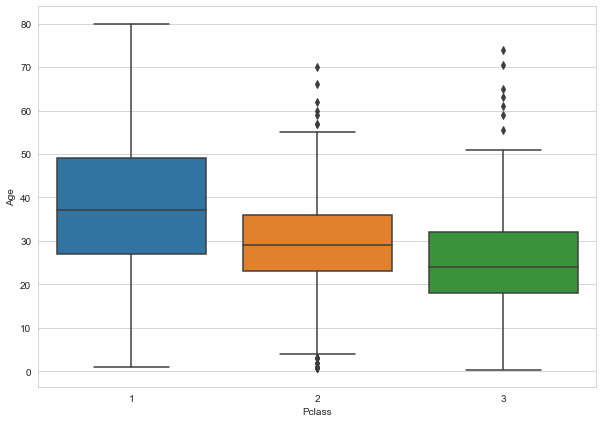

In [27]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

## Results Interpretation
- From the plot, I observe that when I separated the passengers by class, the wealthiest passengers in the first and second class tend to be a bit older than the passengers in the third class and this kind of makes sense.

**Now that I have that, I can use this average age values to impute the age values of the passenger class** using **IMPUTATION**.

In [28]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
            return Age

In [29]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

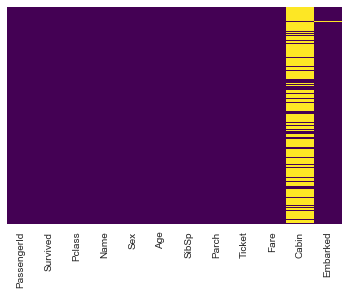

In [30]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

- Notice the **Age Column have now been fillled with the average age value from each class** 
- Because the **Cabin column** have plenty of missing values, I will go ahead and drop the column.

In [31]:
train.drop('Cabin', axis=1,inplace=True)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


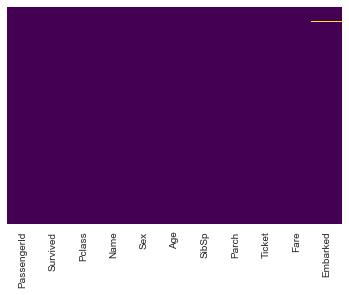

In [33]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Clean Dataset
- Notice a few more missing values in the **Embarked** column. I will go ahead and drop all missing values.

In [34]:
train.dropna(inplace=True)

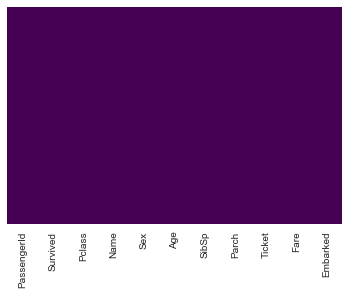

In [35]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

- Now I have a clean dataset.

## Dealing with Category Features

- Next I will convert categroical features into what is known as a **dummy variable** using pandas.
- Becuase our machine learning algorithms won't be able to take in the features. 
- For example, in the 'Sex' column, we have male and female. To deal with this,  I will have to create a different columen with 0 (when they are not female) and 1 (when they are female for exmple) code that algorithm in a way that machine learning algorithm can understand it.

"A **dummy variable (aka, an indicator variable)** is a numeric variable that represents categorical data, such as gender, race, political affiliation, etc. Technically, dummy variables are dichotomous, quantitative variables. Their range of values is small; they can take on only two quantitative values".

In [36]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


## Problem of Multi-Collinearity

- This problem of multicollinearity arrises because one column here can be a perfect predictor of other. For example when the algorithm is fed with 0, it can easily predict the other to be 1.
"**Multicollinearity** refers to a situation in which two or more explanatory variables in a multiple regression model are highly linearly related. We have perfect multicollinearity if, for example, the correlation between two independent variables is equal to 1 or −1.

## Dealing with Problem of Multi-collinearity
- To deal with the problem of multi-collinearity, I will insert the argument **drop_first=True**

In [37]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [38]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


- Now that I have dropped the first column, this is what I will feed into my algorithm
- Next, I will do the same for the Embarked column 

In [39]:
embarked = pd.get_dummies(train['Embarked'],drop_first=True)

In [40]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


# Concatenate
- I will use **pd.concat()** to add the **sex** and **Embarked** list to the Dataset, setting the axis=1 because I want to add these to the column.

In [41]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [42]:
embarked = pd.get_dummies(train['Embarked'],drop_first=True)

In [43]:
train = pd.concat([train,sex,embarked],axis=1)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


- Next I will drop all data and columns (such as Names, Ticket, Sex and Embarked) that I will not be using to train the model since I have now created a different numerical column for them.

In [45]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [46]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Training Dataset

- Now this looks perfect for my machine learning algorithms. 
- Notice that all the data is now a numerical value.
- Notice also that the **passengerid** column is just the index starting from 1. So I will drop the column.
- Something interesting worth noting is that the **Pclass** is a categorical column of 1, 2 and 3 which implies that I could also use **pd.get_dummies()**. But for now, I will leave it the way it is and perform **dummies** later to figure out the difference between categorical data and continous varaibles.

In [47]:
train.drop('PassengerId',axis=1,inplace=True)

In [48]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Training a Logistic Regression model
- First I will split the Dataset into **train_test_split**

## Train Test Split

In [49]:
X = train.drop('Survived',axis=1) 
y = train['Survived']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [54]:
logmodel = LogisticRegression()

In [55]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
predictions = logmodel.predict(X_test)

## Model Evaluation
- For classification task, the sklearn have a really good report

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



## Confusion Matrix

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 36,  68]])

## Great Job!